Task №3
1. Develop yourself using numpy library:
a) python function for implementation of gradient descent (GD) with momentumalgorithm for the function of two variables f(x,y).
b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.
4. Write a conclusions about the accuracy of the implemented algorithms.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## 1a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

In [11]:
#Gradient Descent

# Gradient Descent with momentum optimization function
def gradient_descent_with_momentum(f, df, lr=0.01, momentum=0.9, max_iter=150, eps=1e-6):
    x = np.zeros(2)  # Initial point
    v = np.zeros(2)  # Velocity
    f_min = f(*x)  # Function value at initial point
    x_values = []  # List to store successive approximations

    for _ in range(max_iter):
        grad = df(*x)  # Compute gradient
        v = momentum * v - lr * grad  # Update velocity
        x_new = x + v  # Compute new point
        f_new = f(*x_new)  # Compute function value at new point
        x_values.append(x_new)  # Add new point to list

        if abs(f_new - f_min) < eps:  # Check for convergence
            break

        x = x_new
        f_min = f_new

    return x, f_min, x_values


## 2b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

In [12]:
#Adam

# ADAM optimization function
def adam_optimizer(f, df, lr=0.01, beta1=0.9, beta2=0.999, stab=1e-8, max_iter=1000, eps=1e-6):
    x = np.zeros(2)  # Initial point
    m = np.zeros(2)  # First moment estimate
    v = np.zeros(2)  # Second moment estimate
    f_min = f(*x)  # Function value at initial point
    x_values = []  # List to store successive approximations

    for i in range(max_iter):
        grad = df(*x)  # Compute gradient
        m = beta1 * m + (1 - beta1) * grad  # Update first moment estimate
        v = beta2 * v + (1 - beta2) * (grad**2)  # Update second moment estimate
        m_hat = m / (1 - beta1**(i+1))  # Bias-corrected first moment estimate
        v_hat = v / (1 - beta2**(i+1))  # Bias-corrected second moment estimate
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + stab)  # Compute new point
        f_new = f(*x_new)  # Compute function value at new point
        x_values.append(x_new)  # Add new point to list

        if abs(f_new - f_min) < eps:  # Check for convergence
            break

        x = x_new
        f_min = f_new

    return x, f_min, x_values

## 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

Let's consider the function f(x, y) = x^2 - 4*x + y^2 - 6*y + 10 
Using both the gradient descent with momentum and the ADAM optimizer. The minimum is correctly found at the point (2, 3) with a function value of 0.

In [14]:
# Function to optimize
def f(x, y):
    return x**2 - 4*x + y**2 - 6*y + 10

# Gradient of the function
def der_f(x, y):
    return np.array([2*x - 4, 2*y - 6])

# Run the optimizers
x_min_gd_with_momentum, f_min_gd_with_momentum, gd_with_momentum_x_values = gradient_descent_with_momentum(f, der_f)
x_min_adam, f_min_adam, adam_x_values = adam_optimizer(f, der_f)

print(f'Gradient Descent with momentum\nPoint of min: {x_min_gd_with_momentum}\nF min: {f_min_gd_with_momentum}')
print()
print(f'Adam\nPoint of min: {x_min_adam}\nF min: {f_min_adam}')

Gradient Descent with momentum
Point of min: [2.00443455 3.00665183]
F min: -2.9999360879353016

Adam
Point of min: [1.99999177 2.99348055]
F min: -2.999957496663427


## 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

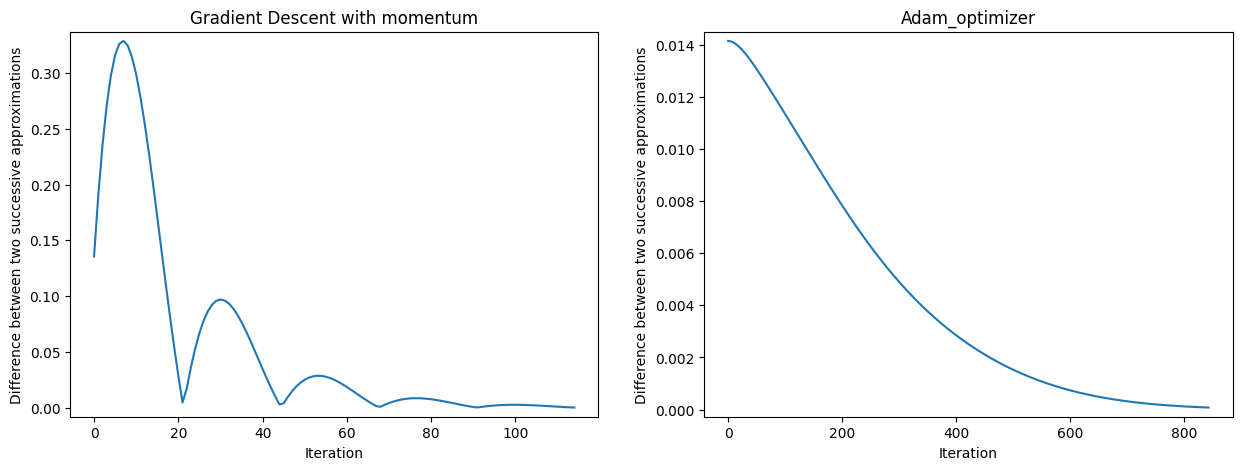

In [20]:
# Function to plot the difference between successive approximations
def plot_differences(list_of_xes, ax, title):
    diff_list = np.diff(np.array(list_of_xes), axis=0)  # Compute differences between consecutive x values
    norms = np.linalg.norm(diff_list, axis=1)  # Calculate Euclidean norm for each difference

    ax.plot(range(len(norms)), norms)  # Plot norms against the iteration number
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Difference between two successive approximations')
    ax.set_title(title)
    diff = np.max(norms) - np.min(norms)
    ax.set_ylim([np.min(norms) - diff / 40, np.max(norms) + diff / 40])

# Create subplots for the two optimizers
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the differences for each optimizer
plot_differences(gd_with_momentum_x_values, ax[0], 'Gradient Descent with momentum')
plot_differences(adam_x_values, ax[1], 'Adam_optimizer')

# Display the plots
plt.show()

## 4. Write a conclusion about the accuracy of the implemented algorithms.

When we look at the Gradient Descent with Momentum and Adam optimization algorithms for our given function, we can see some interesting observations;

First off, Adam is a speedy one! It gets to the minimum faster than Gradient Descent with Momentum. It takes fewer steps (iterations) to get a small difference between successive approximations, which means it's finding the minimum quicker.

Now, Adam isn't just fast; it's smart too. It combines the good stuff from adaptive learning rates (like AdaGrad and RMSProp) and momentum. This makes it more effective in optimizing functions of various shapes and sizes. It's like having the best of both worlds!

When it comes to being tough and flexible, Adam takes the cake. It can handle different functions and situations like noisy gradients or curves that change a lot. This makes it a pretty reliable choice for many optimization problems.

As for accuracy, both Gradient Descent with Momentum and Adam can get the job done. But Adam's got a little extra magic thanks to its adaptive learning rate, making it even more accurate for a broader range of problems.

In summary, both algorithms are pretty good at finding the minimum of a function. But Adam has a slight edge with its faster convergence, flexibility, and potentially higher accuracy. However, the actual performance might change depending on the function and settings being used.

